In [1]:
!pip install yfinance pandas_datareader

  Preparing metadata (setup.py) ... done
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=fa1bf6eb5fbfc3b77268b7fdd26f1897b8585fb26c4d56d36b5cc3cf38092256
  Stored in directory: /root/.cache/pip/wheels/34/ba/79/c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking


In [2]:
import numpy as np
import pandas as pd
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
techlist=['AAPL','GOOG','MSFT','AMZN']
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [4]:
for stock in techlist:
    globals()[stock]=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

In [6]:
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

<AxesSubplot:title={'center':"APPLE's stock price"}, xlabel='Date'>

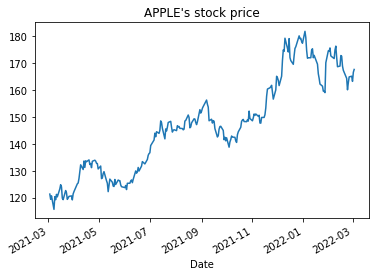

In [7]:
ticker = yf.Ticker('AAPL')
aapl_df = ticker.history(period="1y")
aapl_df['Close'].plot(title="APPLE's stock price")

In [8]:
ma_day = [10,20,30]
for ma in ma_day:
    for company in company_list:
        company['MA_'+str(ma)] = company['Close'].rolling(window=ma).mean()

In [9]:
df = DataReader('AAPL',data_source='yahoo',start='2000-1-1',end='2022-1-1')

In [10]:
data = df.filter(['Close'])

In [11]:
dataset = data.values

In [12]:
training_data_len = math.ceil(len(dataset) * .8)

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [14]:
training_data = scaled_data[0:training_data_len, :]

In [15]:
x_train = []
y_train = []
for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)

[array([0.00424861, 0.00378073, 0.00385509, 0.0034089 , 0.003632  ,
       0.00354524, 0.00329735, 0.00302158, 0.00349566, 0.00367847,
       0.00385199, 0.00398213, 0.00432607, 0.00421762, 0.00396664,
       0.0042641 , 0.00416185, 0.00415255, 0.00373735, 0.0038427 ,
       0.00366918, 0.00359791, 0.00382101, 0.0040534 , 0.00435396,
       0.00439424, 0.00428269, 0.00432607, 0.00409058, 0.00444072,
       0.00459874, 0.00435706, 0.00439424, 0.00421453, 0.00434156,
       0.0044624 , 0.0044105 , 0.00417114, 0.00431368, 0.00438185,
       0.00515958, 0.00474748, 0.00504493, 0.00493029, 0.00479085,
       0.00474748, 0.00475987, 0.00493339, 0.00471339, 0.00436325,
       0.0044624 , 0.00472578, 0.0048962 , 0.00479705, 0.00538887,
       0.00584746, 0.00570493, 0.00557479, 0.00561817, 0.00559648])]
[0.0054384522760064155]
[array([0.00424861, 0.00378073, 0.00385509, 0.0034089 , 0.003632  ,
       0.00354524, 0.00329735, 0.00302158, 0.00349566, 0.00367847,
       0.00385199, 0.00398213, 0.0

In [16]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [18]:
model = Sequential()
model.add(LSTM(128, return_sequences=True ,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(88, return_sequences=True))
model.add(LSTM(48, return_sequences=False))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='linear'))


2022-03-03 15:06:43.104990: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 15:06:43.221632: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 15:06:43.222389: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-03 15:06:43.223650: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 128)           66560     
_________________________________________________________________
dropout (Dropout)            (None, 60, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 88)            76384     
_________________________________________________________________
lstm_2 (LSTM)                (None, 48)                26304     
_________________________________________________________________
dense (Dense)                (None, 128)               6272      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1

In [20]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [21]:
model.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50


2022-03-03 15:06:46.056114: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-03 15:06:50.279089: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


137/137 [==============================] - 7s 13ms/step - loss: 3.2983e-04
Epoch 2/50
137/137 [==============================] - 1s 11ms/step - loss: 2.7189e-05
Epoch 3/50
137/137 [==============================] - 1s 10ms/step - loss: 2.1960e-05
Epoch 4/50
137/137 [==============================] - 1s 10ms/step - loss: 2.3023e-05
Epoch 5/50
137/137 [==============================] - 1s 10ms/step - loss: 1.9174e-05
Epoch 6/50
137/137 [==============================] - 2s 12ms/step - loss: 1.8872e-05
Epoch 7/50
137/137 [==============================] - 1s 10ms/step - loss: 1.8954e-05
Epoch 8/50
137/137 [==============================] - 1s 10ms/step - loss: 1.4772e-05
Epoch 9/50
137/137 [==============================] - 1s 10ms/step - loss: 1.6727e-05
Epoch 10/50
137/137 [==============================] - 1s 10ms/step - loss: 2.1577e-05
Epoch 11/50
137/137 [==============================] - 1s 10ms/step - loss: 1.5812e-05
Epoch 12/50
137/137 [==============================] - 1s 10ms/

In [22]:
test_data = scaled_data[training_data_len:, :]
X_test = []
Y_test = []

for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    Y_test.append(test_data[i, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [23]:
preds = model.predict(X_test)

In [24]:
preds = scaler.inverse_transform(preds)

In [25]:
rmse = np.sqrt(mean_squared_error(Y_test, preds))

In [26]:
train = data[:training_data_len]
valid = data[training_data_len+60:]
valid['Predictions'] = preds

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


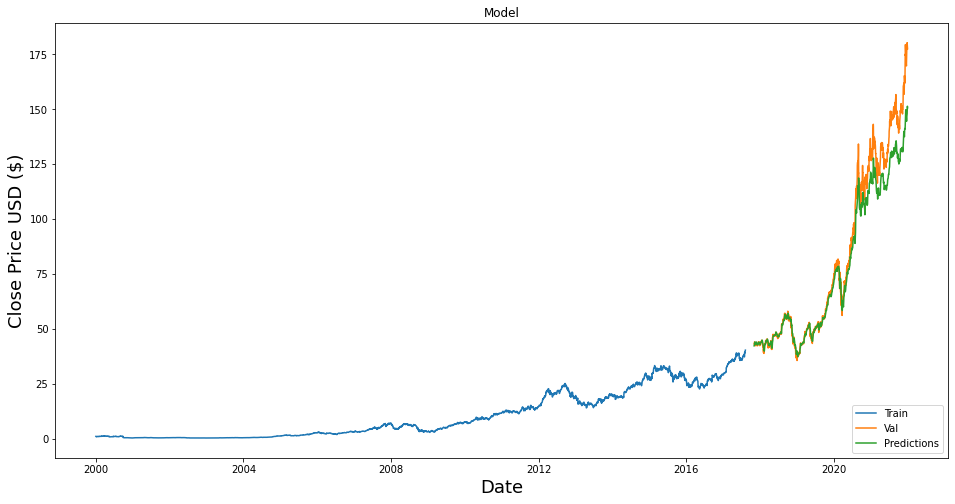

In [27]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()